# UCD Professional Academy - Data Analysis Project - Mary Rigney
    


## Real-world scenario

The datasets being used here are sourced by API from Fáilte Ireland's Open Data API. This provides information on accommodation, activites and attractions located in the Republic of Ireland. The location of the APIs is:

https://failteireland.developer.azure-api.net/apis

This is the first phase of the Data Extraction and shows how data is extracted from an API.

The license is Creative Commons.


## Modules used in the project


In [1]:
# Import the modules needed

# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

# For importing from API
import urllib.request, json

# For handling CSV file
import csv

# For handling data
import pandas as pd

# For plotting
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# For numerical manipulation
import numpy as np

# For Regex
import re

# For displaying text
from IPython.display import display

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from scipy import stats

# For creating the train test split
from sklearn.model_selection import train_test_split

# Used for Boosting
from sklearn import tree
from matplotlib import style
style.use('fivethirtyeight')
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
import scipy.stats as sps

## Importing Data

## get_api_to_csv function

This function will read in the name of a url and a csv file name. The data from the URL get is written to a CSV file.  Then the first 5 lines of the CSV file are output to see what the data looks like.  This is an example of a reusable Python function.

In [2]:
def get_api_to_csv(Urlname,CSVName):
    print('The URL being fetched is ' + Urlname)
    print('The CSV being written to is ' + CSVName)

    try:
      # Name of url to be passed in
      url = Urlname

      hdr ={
      # Request headers
      'Cache-Control': 'no-cache',
      }

      req = urllib.request.Request(url, headers=hdr)

      req.get_method = lambda: 'GET'
      response = urllib.request.urlopen(req)

      # This should be 200 if successful
      if response:
          print('URL get Request is successful, return code is ' + str(response.getcode()))
      else:
          print('URL get Request returned an error, return code is ' + str(response.getcode()))

      # Read the data
      readdata = response.read()

      # Write the data to a csv file
      with open(CSVName,'wb') as f:
          f.write(readdata)
          f.close()

    except Exception as e:
         print(e)


## Get the accommodation data from API to CSV

In [3]:

get_api_to_csv('https://failteireland.azure-api.net/opendata-api/v1/accommodation/csv','accomodation.csv')


The URL being fetched is https://failteireland.azure-api.net/opendata-api/v1/accommodation/csv
The CSV being written to is accomodation.csv
URL get Request is successful, return code is 200


## Get the attractions data from API to CSV

In [4]:

get_api_to_csv('https://failteireland.azure-api.net/opendata-api/v1/attractions/csv','attractions.csv')


The URL being fetched is https://failteireland.azure-api.net/opendata-api/v1/attractions/csv
The CSV being written to is attractions.csv
URL get Request is successful, return code is 200


## Get the activities data from API to CSV


In [5]:

get_api_to_csv('https://failteireland.azure-api.net/opendata-api/v1/activities/csv','activities.csv')


The URL being fetched is https://failteireland.azure-api.net/opendata-api/v1/activities/csv
The CSV being written to is activities.csv
URL get Request is successful, return code is 200


## Analysing Data 

## check_out_data function

The next step is to see what the data looks like when imported into a Pandas Dataframe.  The function will read the csv file into a Dataframe, show the first 5 lines of the file, check the shape, the datatypes and show the null values.  

In [6]:
def check_out_data(CSVname):

    display('The dataset being examined is ' + CSVname)
    print(' ')

    data = pd.read_csv(CSVname)
    
    pd.options.display.width = 0
    
    # Print the first 5 lines of the data
    print('Have a look at the first 5 lines of the data')
    print(' ')
    display(data.head())
    print(' ')

    # Show the shape of the data i.e. rows and columns
    print('Show the shape of the data i.e. rows and columns')
    print(' ')
    display(data.shape)
    print(' ')

    # Show the data types to see if they are suitable

    print('Show the datatypes to see if they are suitable')
    print(' ')
    display(data.dtypes)
    print(' ')

    # Next check for nulls
    print('Next we will check for null values in the data, if there is null data in a column, this will be True,'
          'so we will need to look at the data in these columns in more depth to decide what needs to be done')
    print(' ')
    null_values_count = data.isnull().any()
    print(null_values_count)
    print(' ')
    
    # Next check for duplicate rows
    duplicateRows = data.duplicated().all
    
    if duplicateRows == 'True':
        print('There are duplicate rows in this dataframe')
    else:
        print('There are no duplicate rows in this dataframe')
        print(' ')


## Check out accommodation data

In [7]:

check_out_data('accomodation.csv')

'The dataset being examined is accomodation.csv'

 
Have a look at the first 5 lines of the data
 


,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags
0,Killarney Lodge,http://www.killarneylodge.ie,+353(0)646636499,-9.505884,52.056616,Kerry,Killarney,Republic of Ireland,Guesthouse
1,Hideaway Camping and Caravan Park,NaN,+353(0)2822254,-9.260331,51.541699,Cork,Skibbereen,Republic of Ireland,Camping
2,Clonvilla,NaN,+353(0)2498288,-7.924324,51.910660,Cork,Youghal,Republic of Ireland,Camping
3,Rosses Point Caravan Park (Greenlands),http://www.sligocaravanandcamping.ie,+353(0)719177113,-8.569483,54.306976,Sligo,Rosses Point,Republic of Ireland,Camping
4,Strandhill Caravan and Camping Park,http://www.sligocaravanandcamping.ie,+353(0)719168111,-8.605472,54.271988,Sligo,Airport Road,Republic of Ireland,Camping


 
Show the shape of the data i.e. rows and columns
 


(2396, 9)

 
Show the datatypes to see if they are suitable
 


Name                object
Url                 object
Telephone           object
Longitude          float64
Latitude           float64
AddressRegion       object
AddressLocality     object
AddressCountry      object
Tags                object
dtype: object

 
Next we will check for null values in the data, if there is null data in a column, this will be True,so we will need to look at the data in these columns in more depth to decide what needs to be done
 
Name               False
Url                 True
Telephone           True
Longitude          False
Latitude           False
AddressRegion      False
AddressLocality     True
AddressCountry     False
Tags               False
dtype: bool
 
There are no duplicate rows in this dataframe
 


## Analysing Data

## clean_the_data function

This function will clean the data for the 3 CSV files and output the cleaned data to a Pandas DataFrame.  The 3 files have the same columns, so the code is reusable for all 3. Missing values are replaced.

In [8]:
def clean_the_data(CSVName):

    # Read the CSV file
    print('The dataset being read is ' + CSVName)
    print(' ')

    data = pd.read_csv(CSVName)

    # Set screen options
    pd.options.display.width = 0

    # Count missing values
    missing_values_count = data.isnull().sum()
    print('There are missing values as follows:  ')
    print(' ')
    print(missing_values_count[0:9])
    print(' ')

    # Replace nulls in the Url field with the value 'No Url available'
    print(' ')
    print('Before changes - some values of Url have null values')
    print(' ')
    display(data[data.Url.isnull()])
    data['Url'] = data['Url'].fillna('No Url Available')
    print(' ')
    print('After changes - Url nulls replaced with text')
    print(' ')
    display(data[data['Url'].str.contains('No Url Available')])

    # Replace nulls in the Telephone column with 'No phone number'
    print('Before changes - some values of Telephone have null values')
    print(' ')
    display(data[data.Telephone.isnull()])
    print(' ')
    data['Telephone'] = data['Telephone'].fillna('No phone number')
    print(' ')
    print('After changes - Telephone nulls replaced with text')
    display(data[data['Telephone'].str.contains('No phone number')])
    print(' ')

    # Replace the nulls in AddressRegion with 'Unknown'
    print('Before changes - some values of AddressRegion have null values')
    print(' ')
    display(data[data.AddressRegion.isnull()])
    print(' ')
    data['AddressRegion'] = data['AddressRegion'].fillna('Unknown')
    print(' ')
    print('After changes - AddressRegion nulls replaced with text')
    display(data[data['AddressRegion'].str.contains('Unknown')])
    print(' ')
    
    # Replace the nulls in AddressLocality with 'Unknown'
    print('Before changes - some values of AddressLocality have null values')
    print(' ')
    display(data[data.AddressLocality.isnull()])
    print(' ')
    data['AddressLocality'] = data['AddressLocality'].fillna('Unknown')
    print(' ')
    print('After changes - AddressLocality nulls replaced with text')
    display(data[data['AddressLocality'].str.contains('Unknown')])
    print(' ')
    
    # Replace the nulls in AddressCountry with 'Republic of Ireland'
    print('Before changes - some values of AddressCountry have null values')
    print(' ')
    display(data[data.AddressCountry.isnull()])
    print(' ')
    data['AddressCountry'] = data['AddressCountry'].fillna('Unknown')
    print(' ')
    print('After changes - AddressCountry nulls replaced with text')
    display(data[data['AddressCountry'].str.contains('Republic of Ireland')])
    print(' ')
    
    # Replace the nulls in Tags with 'General Activities'
    print('Before changes - some values of Tags have null values')
    print(' ')
    display(data[data.Tags.isnull()])
    print(' ')
    data['Tags'] = data['Tags'].fillna('General Activities')
    print(' ')
    print('After changes - Tags nulls replaced with text')
    display(data[data['Tags'].str.contains('General Activities')])
    print(' ')

    # The AddressCountry is not consistent - we want to rename all those with 'Ireland' to 'Republic of Ireland'
    print(' ')
    print('Before changes - some values of AddressCountry have Ireland')
    print(' ')
    display(data[data['AddressCountry'] == 'Ireland'])
    print(' ')
    print('After changes - all have Republic of Ireland')
    data.loc[data.AddressCountry == 'Ireland', 'AddressCountry'] = 'Republic of Ireland'
    display(data[data['AddressCountry'] == 'Ireland'])
    print(' ')

    # Print missing values again
    missing_values_count = data.isnull().sum()
    display(missing_values_count[0:9])
    print(' ')
    
    # Create a dataframe with the cleaned data
    print('Dataframe created with clean data')
    df = pd.DataFrame(data)
    display(df)
    return df

## Accommodation cleaning 

From the first 5 lines of data, we can see that there are nulls in the Url column, we can see the number of rows and columns, datatypes are object and float64, there are nulls in the Url, Telephone and AddressLocality columns. We can also see that there are no duplicate rows.  The cleaned data is output to the df1 DataFrame.

In [9]:

df1 = clean_the_data('accomodation.csv')


The dataset being read is accomodation.csv
 
There are missing values as follows:  
 
Name                 0
Url                173
Telephone            4
Longitude            0
Latitude             0
AddressRegion        0
AddressLocality    196
AddressCountry       0
Tags                 0
dtype: int64
 
 
Before changes - some values of Url have null values
 


,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags
1,Hideaway Camping and Caravan Park,NaN,+353(0)2822254,-9.260331,51.541699,Cork,Skibbereen,Republic of Ireland,Camping
2,Clonvilla,NaN,+353(0)2498288,-7.924324,51.910660,Cork,Youghal,Republic of Ireland,Camping
12,O'Sheas Caravan and Camping Park,NaN,+353(0)2763140,-9.543672,51.750909,Cork,Glengarriff,Republic of Ireland,Camping
17,Meadow Camping Park,NaN,+353(0)2833280,-9.109050,51.564219,Cork,Glandore,Republic of Ireland,Camping
18,Jasmine Villa,NaN,+353(0)214883234,-8.239670,51.911458,Cork,Carrigtwohill,Republic of Ireland,Camping
...,...,...,...,...,...,...,...,...,...
2362,Mulgrave Lodge,NaN,+35312801664,-6.136987,53.290174,Dublin,Dún Laoghaire,Republic of Ireland,Hostel
2367,Woodview Lodge,NaN,+353(0)892248291,-6.739805,53.542339,Meath,Trim,Republic of Ireland,B&B
2376,Árasáin Cholmcille,NaN,+353861261103,-8.231753,55.266381,Donegal,Tory Island - Toraigh,Republic of Ireland,Self Catering Accommodation
2382,Cheerful Cottage,NaN,+353872383695,-9.552221,53.794483,Mayo,Westport,Republic of Ireland,"Self Catering Accommodation,Welcome Standard"


 
After changes - Url nulls replaced with text
 


,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags
1,Hideaway Camping and Caravan Park,No Url Available,+353(0)2822254,-9.260331,51.541699,Cork,Skibbereen,Republic of Ireland,Camping
2,Clonvilla,No Url Available,+353(0)2498288,-7.924324,51.910660,Cork,Youghal,Republic of Ireland,Camping
12,O'Sheas Caravan and Camping Park,No Url Available,+353(0)2763140,-9.543672,51.750909,Cork,Glengarriff,Republic of Ireland,Camping
17,Meadow Camping Park,No Url Available,+353(0)2833280,-9.109050,51.564219,Cork,Glandore,Republic of Ireland,Camping
18,Jasmine Villa,No Url Available,+353(0)214883234,-8.239670,51.911458,Cork,Carrigtwohill,Republic of Ireland,Camping
...,...,...,...,...,...,...,...,...,...
2362,Mulgrave Lodge,No Url Available,+35312801664,-6.136987,53.290174,Dublin,Dún Laoghaire,Republic of Ireland,Hostel
2367,Woodview Lodge,No Url Available,+353(0)892248291,-6.739805,53.542339,Meath,Trim,Republic of Ireland,B&B
2376,Árasáin Cholmcille,No Url Available,+353861261103,-8.231753,55.266381,Donegal,Tory Island - Toraigh,Republic of Ireland,Self Catering Accommodation
2382,Cheerful Cottage,No Url Available,+353872383695,-9.552221,53.794483,Mayo,Westport,Republic of Ireland,"Self Catering Accommodation,Welcome Standard"


Before changes - some values of Telephone have null values
 


,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags
1680,Inis Meáin Restaurant & Suites,https://inismeain.com/,NaN,-9.584231,53.086513,Galway,NaN,Ireland,"B&B,Welcome Standard"
1739,W8 Village,https://www.w8centre.ie/stay/,NaN,-8.174361,54.304406,Leitrim,Manorhamilton,Ireland,Self Catering Accommodation
1981,Herbert House,No Url Available,NaN,-9.507512,52.050792,Kerry,Killarney,Republic of Ireland,Guesthouse
2000,Tubbrid Castle,https://www.tubbridcastle.com/stay,NaN,-7.479059,52.712698,Kilkenny,Urlingford,Republic of Ireland,"Self Catering Accommodation,Welcome Standard"


 
 
After changes - Telephone nulls replaced with text


,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags
1680,Inis Meáin Restaurant & Suites,https://inismeain.com/,No phone number,-9.584231,53.086513,Galway,NaN,Ireland,"B&B,Welcome Standard"
1739,W8 Village,https://www.w8centre.ie/stay/,No phone number,-8.174361,54.304406,Leitrim,Manorhamilton,Ireland,Self Catering Accommodation
1981,Herbert House,No Url Available,No phone number,-9.507512,52.050792,Kerry,Killarney,Republic of Ireland,Guesthouse
2000,Tubbrid Castle,https://www.tubbridcastle.com/stay,No phone number,-7.479059,52.712698,Kilkenny,Urlingford,Republic of Ireland,"Self Catering Accommodation,Welcome Standard"


 
Before changes - some values of AddressRegion have null values
 


,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags


 
 
After changes - AddressRegion nulls replaced with text


,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags


 
Before changes - some values of AddressLocality have null values
 


,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags
15,Mannix Point Camping and Caravan Park,http://www.campinginkerry.com,+353(0)669472806,-10.245260,51.941941,Kerry,NaN,Republic of Ireland,Camping
19,Keel Sandybanks Caravan and Camping Park,http://www.achillcamping.com,+353(0)9843211,-10.077045,53.974912,Mayo,NaN,Republic of Ireland,Camping
44,Glen Hotel,http://www.theglenhotel.weebly.com,+353(0)749520505,-8.499614,54.990070,Donegal,NaN,Republic of Ireland,Hotel
65,Riverbank House Hotel,http://www.riverbankhousehotel.com,+353(0)539123611,-6.455005,52.344689,Wexford,NaN,Republic of Ireland,Hotel
76,Sligo Southern Hotel,https://www.sligosouthernhotel.ie/,353719162101,-8.482776,54.271464,Sligo,NaN,Republic of Ireland,Hotel
...,...,...,...,...,...,...,...,...,...
1796,Dromoland Castle Hotel,https://www.dromoland.ie/,+353(0)61368144,-8.905660,52.783474,Clare,NaN,Republic of Ireland,Hotel
2050,Renvyle - Love Connemara Cottages,https://www.loveconnemaracottages.com/renvyle/,+3539530620,-10.020125,53.487679,Galway,NaN,Republic of Ireland,"Self Catering Accommodation,Welcome Standard"
2372,Shannon Park House,http://www.inviteireland.com/Accommodation/car...,+353(0)214372091,-8.395160,51.825419,Cork,NaN,Republic of Ireland,B&B
2373,Carrigaline Court Hotel and Leisure Centre,http://www.carrigcourt.com,+353214852100,-8.391934,51.816256,Cork,NaN,Republic of Ireland,Hotel


 
 
After changes - AddressLocality nulls replaced with text


,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags
15,Mannix Point Camping and Caravan Park,http://www.campinginkerry.com,+353(0)669472806,-10.245260,51.941941,Kerry,Unknown,Republic of Ireland,Camping
19,Keel Sandybanks Caravan and Camping Park,http://www.achillcamping.com,+353(0)9843211,-10.077045,53.974912,Mayo,Unknown,Republic of Ireland,Camping
44,Glen Hotel,http://www.theglenhotel.weebly.com,+353(0)749520505,-8.499614,54.990070,Donegal,Unknown,Republic of Ireland,Hotel
65,Riverbank House Hotel,http://www.riverbankhousehotel.com,+353(0)539123611,-6.455005,52.344689,Wexford,Unknown,Republic of Ireland,Hotel
76,Sligo Southern Hotel,https://www.sligosouthernhotel.ie/,353719162101,-8.482776,54.271464,Sligo,Unknown,Republic of Ireland,Hotel
...,...,...,...,...,...,...,...,...,...
1796,Dromoland Castle Hotel,https://www.dromoland.ie/,+353(0)61368144,-8.905660,52.783474,Clare,Unknown,Republic of Ireland,Hotel
2050,Renvyle - Love Connemara Cottages,https://www.loveconnemaracottages.com/renvyle/,+3539530620,-10.020125,53.487679,Galway,Unknown,Republic of Ireland,"Self Catering Accommodation,Welcome Standard"
2372,Shannon Park House,http://www.inviteireland.com/Accommodation/car...,+353(0)214372091,-8.395160,51.825419,Cork,Unknown,Republic of Ireland,B&B
2373,Carrigaline Court Hotel and Leisure Centre,http://www.carrigcourt.com,+353214852100,-8.391934,51.816256,Cork,Unknown,Republic of Ireland,Hotel


 
Before changes - some values of AddressCountry have null values
 


,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags


 
 
After changes - AddressCountry nulls replaced with text


,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags
0,Killarney Lodge,http://www.killarneylodge.ie,+353(0)646636499,-9.505884,52.056616,Kerry,Killarney,Republic of Ireland,Guesthouse
1,Hideaway Camping and Caravan Park,No Url Available,+353(0)2822254,-9.260331,51.541699,Cork,Skibbereen,Republic of Ireland,Camping
2,Clonvilla,No Url Available,+353(0)2498288,-7.924324,51.910660,Cork,Youghal,Republic of Ireland,Camping
3,Rosses Point Caravan Park (Greenlands),http://www.sligocaravanandcamping.ie,+353(0)719177113,-8.569483,54.306976,Sligo,Rosses Point,Republic of Ireland,Camping
4,Strandhill Caravan and Camping Park,http://www.sligocaravanandcamping.ie,+353(0)719168111,-8.605472,54.271988,Sligo,Airport Road,Republic of Ireland,Camping
...,...,...,...,...,...,...,...,...,...
2391,Duffys of Ballybin,http://duffysofballybin.ie/,+353(0)866033958,-6.429597,53.510127,Meath,Ashbourne,Republic of Ireland,Self Catering Accommodation
2392,Green Meadow Farm Holiday Accommodation,http://www.greenmeadowfarm.ie/,+353879320334,-6.159848,52.888500,Wicklow,Redcross,Republic of Ireland,Self Catering Accommodation
2393,O'Connor's Farmhouse,http://www.oconnorsdoolin.com,+353657074314,-9.380141,53.016356,Clare,Doolin,Republic of Ireland,"B&B,Welcome Standard"
2394,Fallon's B&B,http://www.fallonsbedandbreakfastkinvara.ie/,+353(0)91638088,-8.939935,53.139102,Galway,Kinvara,Republic of Ireland,"B&B,Welcome Standard"


 
Before changes - some values of Tags have null values
 


,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags


 
 
After changes - Tags nulls replaced with text


,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags


 
 
Before changes - some values of AddressCountry have Ireland
 


,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags
8,Streamstown Caravan & Camping Park,http://www.tipperarycaravanpark.com,35350521519,-7.839326,52.957265,Tipperary,Roscrea,Ireland,Camping
58,Ferrycarrig Hotel,http://www.ferrycarrighotel.com,+353(0)539120999,-6.505782,52.353729,Wexford,Ferrycarrig,Ireland,Hotel
77,Dun A Ri House Hotel,http://www.dunarihouse.com,353429668091,-6.804064,53.905079,Cavan,Kingscourt,Ireland,Hotel
80,Adare Manor Hotel & Golf Resort,https://www.adaremanor.com/,35361605200,-8.777826,52.564189,Limerick,Adare,Ireland,Hotel
98,Limerick City Hotel,https://www.limerickcityhotel.ie/,35361207000,-8.633411,52.661065,Limerick,Unknown,Ireland,Hotel
...,...,...,...,...,...,...,...,...,...
1787,Nephin,No Url Available,353909642685,-8.244521,53.303788,Galway,Unknown,Ireland,B&B
1790,Crawford House,https://www.crawfordhouse.ie/,353214270290,-8.492082,51.895298,Cork,Unknown,Ireland,"Self Catering Accommodation,Welcome Standard"
1791,Shannon View Farmhouse,https://shannonview.westclare.net/,353858427137,-9.264478,52.618868,Clare,Unknown,Ireland,"B&B,Welcome Standard"
1793,Bundoran Apartments,http://www.bundoranapartments.com,353860767783,-8.274978,54.481214,Donegal,Bundoran,Ireland,"Self Catering Accommodation,Welcome Standard"


 
After changes - all have Republic of Ireland


,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags


Name               0
Url                0
Telephone          0
Longitude          0
Latitude           0
AddressRegion      0
AddressLocality    0
AddressCountry     0
Tags               0
dtype: int64

 
Dataframe created with clean data


,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags
0,Killarney Lodge,http://www.killarneylodge.ie,+353(0)646636499,-9.505884,52.056616,Kerry,Killarney,Republic of Ireland,Guesthouse
1,Hideaway Camping and Caravan Park,No Url Available,+353(0)2822254,-9.260331,51.541699,Cork,Skibbereen,Republic of Ireland,Camping
2,Clonvilla,No Url Available,+353(0)2498288,-7.924324,51.910660,Cork,Youghal,Republic of Ireland,Camping
3,Rosses Point Caravan Park (Greenlands),http://www.sligocaravanandcamping.ie,+353(0)719177113,-8.569483,54.306976,Sligo,Rosses Point,Republic of Ireland,Camping
4,Strandhill Caravan and Camping Park,http://www.sligocaravanandcamping.ie,+353(0)719168111,-8.605472,54.271988,Sligo,Airport Road,Republic of Ireland,Camping
...,...,...,...,...,...,...,...,...,...
2391,Duffys of Ballybin,http://duffysofballybin.ie/,+353(0)866033958,-6.429597,53.510127,Meath,Ashbourne,Republic of Ireland,Self Catering Accommodation
2392,Green Meadow Farm Holiday Accommodation,http://www.greenmeadowfarm.ie/,+353879320334,-6.159848,52.888500,Wicklow,Redcross,Republic of Ireland,Self Catering Accommodation
2393,O'Connor's Farmhouse,http://www.oconnorsdoolin.com,+353657074314,-9.380141,53.016356,Clare,Doolin,Republic of Ireland,"B&B,Welcome Standard"
2394,Fallon's B&B,http://www.fallonsbedandbreakfastkinvara.ie/,+353(0)91638088,-8.939935,53.139102,Galway,Kinvara,Republic of Ireland,"B&B,Welcome Standard"


## Check out attractions data

In [10]:
check_out_data('attractions.csv')


'The dataset being examined is attractions.csv'

 
Have a look at the first 5 lines of the data
 


,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags
0,Dwyer McAllister Cottage,http://www.heritageireland.ie/en/midlands-east...,35340445325,-6.564811,52.961927,Wicklow,Donard,Ireland,"Historic Houses and Castle,Museums and Attraction"
1,Valentia Island - Kerry,https://www.discoverireland.ie/kerry,NaN,-10.362479,51.905771,Kerry,NaN,Republic of Ireland,"Restaurant,Craft,Shopping,Bird Watching,Nature..."
2,The Wicklow Way,https://visitwicklow.ie/the-wicklow-way/,NaN,-6.268393,53.277350,Dublin,Rathfarnham,Ireland,"Cycling,Walking,Natural Landscape"
3,The Táin Way,http://carlingfordandcooleypeninsula.ie/carlin...,+353(0)429373033,-6.397080,54.004607,Louth,Carlingford,Republic of Ireland,"Walking,Natural Landscape"
4,"Walking - The Western Way, Galway",http://www.thewesternway.ie,+353(0)9541116,-9.048728,53.276473,Galway,Galway City,Republic of Ireland,"Walking,Natural Landscape"


 
Show the shape of the data i.e. rows and columns
 


(680, 9)

 
Show the datatypes to see if they are suitable
 


Name                object
Url                 object
Telephone           object
Longitude          float64
Latitude           float64
AddressRegion       object
AddressLocality     object
AddressCountry      object
Tags                object
dtype: object

 
Next we will check for null values in the data, if there is null data in a column, this will be True,so we will need to look at the data in these columns in more depth to decide what needs to be done
 
Name               False
Url                 True
Telephone           True
Longitude          False
Latitude           False
AddressRegion       True
AddressLocality     True
AddressCountry      True
Tags               False
dtype: bool
 
There are no duplicate rows in this dataframe
 


## Attractions cleaning
From the first 5 lines of data, we can see that there are nulls in the Telephone column, we can see the number of rows and columns, datatypes are object and float64, there are nulls in the Url, Telephone, AddressRegion, AddressLocality and AddressCountry columns. There are no duplicate rows. The cleaned data is output to the df2 DataFrame.

In [11]:
df2 = clean_the_data('attractions.csv')

The dataset being read is attractions.csv
 
There are missing values as follows:  
 
Name                 0
Url                105
Telephone          196
Longitude            0
Latitude             0
AddressRegion        5
AddressLocality    228
AddressCountry       3
Tags                 0
dtype: int64
 
 
Before changes - some values of Url have null values
 


,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags
10,The North Kerry Way,NaN,+353(0)667121288,-9.706157,52.266770,Kerry,Tralee,Republic of Ireland,"Walking,Natural Landscape"
22,Balrath Wood,NaN,+353(0)18358022,-6.952316,53.705571,Meath,Balrath,Republic of Ireland,"Walking,Forest Park,Park and Forest Walk,Natio..."
40,Mangan's Loop,NaN,NaN,-6.464196,52.799049,Wicklow,Tinahely,Republic of Ireland,"Walking,Natural Landscape"
46,Slí Na Finne,NaN,+353(0)749721148,-8.116204,54.869422,Donegal,NaN,Republic of Ireland,"Walking,Natural Landscape"
82,Slí Árainn Mhór - Arranmore Island Loop,NaN,353749520533,-8.536290,54.996335,Donegal,NaN,Republic of Ireland,"Walking,Natural Landscape"
...,...,...,...,...,...,...,...,...,...
587,"The Old Bridge, Trim",NaN,NaN,-6.791003,53.556326,Meath,Trim,Ireland,Historic Houses and Castle
589,Rose of Tralee Statue,NaN,NaN,-9.704371,52.267130,Kerry,Tralee,Ireland,"Public Park,Nature and Wildlife,Public Sculpture"
597,Michael Collins Monument,NaN,NaN,-8.856475,51.813550,Cork,NaN,Ireland,Public Sculpture
598,Father Mathew Statue,NaN,NaN,-8.470329,51.899963,Cork,NaN,Ireland,Public Sculpture


 
After changes - Url nulls replaced with text
 


,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags
10,The North Kerry Way,No Url Available,+353(0)667121288,-9.706157,52.266770,Kerry,Tralee,Republic of Ireland,"Walking,Natural Landscape"
22,Balrath Wood,No Url Available,+353(0)18358022,-6.952316,53.705571,Meath,Balrath,Republic of Ireland,"Walking,Forest Park,Park and Forest Walk,Natio..."
40,Mangan's Loop,No Url Available,NaN,-6.464196,52.799049,Wicklow,Tinahely,Republic of Ireland,"Walking,Natural Landscape"
46,Slí Na Finne,No Url Available,+353(0)749721148,-8.116204,54.869422,Donegal,NaN,Republic of Ireland,"Walking,Natural Landscape"
82,Slí Árainn Mhór - Arranmore Island Loop,No Url Available,353749520533,-8.536290,54.996335,Donegal,NaN,Republic of Ireland,"Walking,Natural Landscape"
...,...,...,...,...,...,...,...,...,...
587,"The Old Bridge, Trim",No Url Available,NaN,-6.791003,53.556326,Meath,Trim,Ireland,Historic Houses and Castle
589,Rose of Tralee Statue,No Url Available,NaN,-9.704371,52.267130,Kerry,Tralee,Ireland,"Public Park,Nature and Wildlife,Public Sculpture"
597,Michael Collins Monument,No Url Available,NaN,-8.856475,51.813550,Cork,NaN,Ireland,Public Sculpture
598,Father Mathew Statue,No Url Available,NaN,-8.470329,51.899963,Cork,NaN,Ireland,Public Sculpture


Before changes - some values of Telephone have null values
 


,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags
1,Valentia Island - Kerry,https://www.discoverireland.ie/kerry,NaN,-10.362479,51.905771,Kerry,NaN,Republic of Ireland,"Restaurant,Craft,Shopping,Bird Watching,Nature..."
2,The Wicklow Way,https://visitwicklow.ie/the-wicklow-way/,NaN,-6.268393,53.277350,Dublin,Rathfarnham,Ireland,"Cycling,Walking,Natural Landscape"
12,The South Leinster Way,http://www.irishtrails.ie/Trail/South-Leinster...,NaN,-6.928810,52.602079,Carlow,Borris,Republic of Ireland,"Walking,Natural Landscape"
14,Muckross Lake Loop and Torc Waterfall,https://www.killarneynationalpark.ie/explore/w...,NaN,-9.504292,52.018083,Kerry,Killarney,Ireland,"Walking,National Park,National and Forest Park"
15,The Westmeath Way,https://www.visitwestmeath.ie/get-outdoors/wal...,NaN,-7.317120,53.525000,Westmeath,Kilbeggan,Republic of Ireland,"Walking,Natural Landscape"
...,...,...,...,...,...,...,...,...,...
638,Old Irish Goat Visitor Centre,https://oldirishgoat.ie,NaN,-9.756214,53.906059,Mayo,NaN,Ireland,"Learning,Shopping,Shopping Centres and Departm..."
667,St Brigid's Well & Shrine,No Url Available,NaN,-7.352575,53.549530,Westmeath,NaN,Ireland,Public Sculpture
668,Queen Maeve Trail,https://sligowalks.ie/walks/knocknarea-queen-m...,NaN,-8.585103,54.270174,Sligo,NaN,Ireland,"Walking,Natural Landscape"
671,Ballinastoe and Lower Vartry Reservoir,https://www.sportireland.ie/outdoors/walking/t...,NaN,-6.202243,53.091233,Wicklow,Roundwood,Ireland,"Walking,Natural Landscape"


 
 
After changes - Telephone nulls replaced with text


,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags
1,Valentia Island - Kerry,https://www.discoverireland.ie/kerry,No phone number,-10.362479,51.905771,Kerry,NaN,Republic of Ireland,"Restaurant,Craft,Shopping,Bird Watching,Nature..."
2,The Wicklow Way,https://visitwicklow.ie/the-wicklow-way/,No phone number,-6.268393,53.277350,Dublin,Rathfarnham,Ireland,"Cycling,Walking,Natural Landscape"
12,The South Leinster Way,http://www.irishtrails.ie/Trail/South-Leinster...,No phone number,-6.928810,52.602079,Carlow,Borris,Republic of Ireland,"Walking,Natural Landscape"
14,Muckross Lake Loop and Torc Waterfall,https://www.killarneynationalpark.ie/explore/w...,No phone number,-9.504292,52.018083,Kerry,Killarney,Ireland,"Walking,National Park,National and Forest Park"
15,The Westmeath Way,https://www.visitwestmeath.ie/get-outdoors/wal...,No phone number,-7.317120,53.525000,Westmeath,Kilbeggan,Republic of Ireland,"Walking,Natural Landscape"
...,...,...,...,...,...,...,...,...,...
638,Old Irish Goat Visitor Centre,https://oldirishgoat.ie,No phone number,-9.756214,53.906059,Mayo,NaN,Ireland,"Learning,Shopping,Shopping Centres and Departm..."
667,St Brigid's Well & Shrine,No Url Available,No phone number,-7.352575,53.549530,Westmeath,NaN,Ireland,Public Sculpture
668,Queen Maeve Trail,https://sligowalks.ie/walks/knocknarea-queen-m...,No phone number,-8.585103,54.270174,Sligo,NaN,Ireland,"Walking,Natural Landscape"
671,Ballinastoe and Lower Vartry Reservoir,https://www.sportireland.ie/outdoors/walking/t...,No phone number,-6.202243,53.091233,Wicklow,Roundwood,Ireland,"Walking,Natural Landscape"


 
Before changes - some values of AddressRegion have null values
 


,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags
250,Ballylarkin Abbey Freshford - Ballylarkin Church,http://www.megalithicireland.com/Ballylarkin%2...,No phone number,-7.427511,52.722887,NaN,NaN,NaN,"Church Abbey,Monastery,Churches,Abbeys and Mon..."
433,Cunnamore Pier,No Url Available,No phone number,-9.424822,51.503928,NaN,NaN,NaN,Embarkation Point
434,Colla Pier,No Url Available,No phone number,-9.561419,51.506532,NaN,NaN,NaN,Embarkation Point
462,Blue Pool,No Url Available,No phone number,-9.548947,51.747450,NaN,Beara Peninsula,Ireland,Embarkation Point
533,River Nore,No Url Available,No phone number,-7.344139,52.729459,NaN,NaN,Ireland,"River,Discovery Point"


 
 
After changes - AddressRegion nulls replaced with text


,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags
250,Ballylarkin Abbey Freshford - Ballylarkin Church,http://www.megalithicireland.com/Ballylarkin%2...,No phone number,-7.427511,52.722887,Unknown,NaN,NaN,"Church Abbey,Monastery,Churches,Abbeys and Mon..."
433,Cunnamore Pier,No Url Available,No phone number,-9.424822,51.503928,Unknown,NaN,NaN,Embarkation Point
434,Colla Pier,No Url Available,No phone number,-9.561419,51.506532,Unknown,NaN,NaN,Embarkation Point
462,Blue Pool,No Url Available,No phone number,-9.548947,51.747450,Unknown,Beara Peninsula,Ireland,Embarkation Point
533,River Nore,No Url Available,No phone number,-7.344139,52.729459,Unknown,NaN,Ireland,"River,Discovery Point"


 
Before changes - some values of AddressLocality have null values
 


,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags
1,Valentia Island - Kerry,https://www.discoverireland.ie/kerry,No phone number,-10.362479,51.905771,Kerry,NaN,Republic of Ireland,"Restaurant,Craft,Shopping,Bird Watching,Nature..."
5,The Barrow Way,https://carlowtourism.com/the-barrow-way,35345521240,-6.996183,53.221936,Kildare,NaN,Republic of Ireland,"Walking,Natural Landscape"
8,The Blackwater Way - Duhallow,https://www.corkcoco.ie/en/visiting-cork/walkw...,+353(0)5850007,-8.596740,51.944321,Cork,NaN,Republic of Ireland,"Walking,Natural Landscape"
24,Piltown - Mountain Grove Loop,http://www.trailkilkenny.ie,+353(0)567752111,-7.341114,52.353732,Kilkenny,NaN,Ireland,"Walking,Natural Landscape"
28,Rath Beag Loop,https://www.sportireland.ie/outdoors/walking/t...,No phone number,-7.583323,52.313662,Waterford,NaN,Ireland,"Walking,Natural Landscape"
...,...,...,...,...,...,...,...,...,...
667,St Brigid's Well & Shrine,No Url Available,No phone number,-7.352575,53.549530,Westmeath,NaN,Ireland,Public Sculpture
668,Queen Maeve Trail,https://sligowalks.ie/walks/knocknarea-queen-m...,No phone number,-8.585103,54.270174,Sligo,NaN,Ireland,"Walking,Natural Landscape"
669,The Model - Home of the Niland Collection,https://www.themodel.ie/,353719141405,-8.468651,54.272905,Sligo,NaN,Ireland,"Craft,Shopping,Movies,Cinema,Venue,Art Gallery..."
670,Mitchelstown Cave,http://mitchelstowncave.com/,353527467246,-8.108650,52.305771,Tipperary,NaN,Ireland,"Walking,Activity Operator,Natural Landscape,Tour"


 
 
After changes - AddressLocality nulls replaced with text


,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags
1,Valentia Island - Kerry,https://www.discoverireland.ie/kerry,No phone number,-10.362479,51.905771,Kerry,Unknown,Republic of Ireland,"Restaurant,Craft,Shopping,Bird Watching,Nature..."
5,The Barrow Way,https://carlowtourism.com/the-barrow-way,35345521240,-6.996183,53.221936,Kildare,Unknown,Republic of Ireland,"Walking,Natural Landscape"
8,The Blackwater Way - Duhallow,https://www.corkcoco.ie/en/visiting-cork/walkw...,+353(0)5850007,-8.596740,51.944321,Cork,Unknown,Republic of Ireland,"Walking,Natural Landscape"
24,Piltown - Mountain Grove Loop,http://www.trailkilkenny.ie,+353(0)567752111,-7.341114,52.353732,Kilkenny,Unknown,Ireland,"Walking,Natural Landscape"
28,Rath Beag Loop,https://www.sportireland.ie/outdoors/walking/t...,No phone number,-7.583323,52.313662,Waterford,Unknown,Ireland,"Walking,Natural Landscape"
...,...,...,...,...,...,...,...,...,...
667,St Brigid's Well & Shrine,No Url Available,No phone number,-7.352575,53.549530,Westmeath,Unknown,Ireland,Public Sculpture
668,Queen Maeve Trail,https://sligowalks.ie/walks/knocknarea-queen-m...,No phone number,-8.585103,54.270174,Sligo,Unknown,Ireland,"Walking,Natural Landscape"
669,The Model - Home of the Niland Collection,https://www.themodel.ie/,353719141405,-8.468651,54.272905,Sligo,Unknown,Ireland,"Craft,Shopping,Movies,Cinema,Venue,Art Gallery..."
670,Mitchelstown Cave,http://mitchelstowncave.com/,353527467246,-8.108650,52.305771,Tipperary,Unknown,Ireland,"Walking,Activity Operator,Natural Landscape,Tour"


 
Before changes - some values of AddressCountry have null values
 


,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags
250,Ballylarkin Abbey Freshford - Ballylarkin Church,http://www.megalithicireland.com/Ballylarkin%2...,No phone number,-7.427511,52.722887,Unknown,Unknown,NaN,"Church Abbey,Monastery,Churches,Abbeys and Mon..."
433,Cunnamore Pier,No Url Available,No phone number,-9.424822,51.503928,Unknown,Unknown,NaN,Embarkation Point
434,Colla Pier,No Url Available,No phone number,-9.561419,51.506532,Unknown,Unknown,NaN,Embarkation Point


 
 
After changes - AddressCountry nulls replaced with text


,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags
1,Valentia Island - Kerry,https://www.discoverireland.ie/kerry,No phone number,-10.362479,51.905771,Kerry,Unknown,Republic of Ireland,"Restaurant,Craft,Shopping,Bird Watching,Nature..."
3,The Táin Way,http://carlingfordandcooleypeninsula.ie/carlin...,+353(0)429373033,-6.397080,54.004607,Louth,Carlingford,Republic of Ireland,"Walking,Natural Landscape"
4,"Walking - The Western Way, Galway",http://www.thewesternway.ie,+353(0)9541116,-9.048728,53.276473,Galway,Galway City,Republic of Ireland,"Walking,Natural Landscape"
5,The Barrow Way,https://carlowtourism.com/the-barrow-way,35345521240,-6.996183,53.221936,Kildare,Unknown,Republic of Ireland,"Walking,Natural Landscape"
7,Tipperary Heritage Way,http://www.irishtrails.ie/trail/tipperary-heri...,3536255467,-7.885830,52.516411,Tipperary,Tipperary Town,Republic of Ireland,"Walking,Natural Landscape"
...,...,...,...,...,...,...,...,...,...
626,Allihies Copper Mine Museum,http://www.acmm.ie/theminemuseum,3532773218,-10.045585,51.638933,Cork,Allihies,Republic of Ireland,"Learning,Walking,Museums and Attraction,Cafe,F..."
657,Crag Cave,http://www.cragcave.com,353667141244,-9.444364,52.247082,Kerry,Castleisland,Republic of Ireland,"Natural Landscape,Cafe,Food and Drink,Food Sho..."
660,Dungarvan Castle,https://heritageireland.ie/places-to-visit/dun...,3535848144,-7.616151,52.089265,Waterford,Dungarvan,Republic of Ireland,"Historic Houses and Castle,Castle,Museums and ..."
674,Kilkenny Design Centre,https://kilkennydesign.com,353567722118,-7.249492,52.649822,Kilkenny,Kilkenny City,Republic of Ireland,"Restaurant,Craft,Shopping,Historic Houses and ..."


 
Before changes - some values of Tags have null values
 


,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags


 
 
After changes - Tags nulls replaced with text


,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags


 
 
Before changes - some values of AddressCountry have Ireland
 


,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags
0,Dwyer McAllister Cottage,http://www.heritageireland.ie/en/midlands-east...,35340445325,-6.564811,52.961927,Wicklow,Donard,Ireland,"Historic Houses and Castle,Museums and Attraction"
2,The Wicklow Way,https://visitwicklow.ie/the-wicklow-way/,No phone number,-6.268393,53.277350,Dublin,Rathfarnham,Ireland,"Cycling,Walking,Natural Landscape"
6,Dun na Rí Forest Park,http://www.coillte.ie/site/dun-a-ri-forest-park/,353494331942,-6.792661,53.918978,Cavan,Kingscourt,Ireland,"Walking,Forest Park,Park and Forest Walk,Natio..."
9,The Mid Clare Way,https://www.sportireland.ie/outdoors/walking/t...,353656835912,-8.899005,52.760668,Clare,Newmarket,Ireland,"Walking,Natural Landscape"
14,Muckross Lake Loop and Torc Waterfall,https://www.killarneynationalpark.ie/explore/w...,No phone number,-9.504292,52.018083,Kerry,Killarney,Ireland,"Walking,National Park,National and Forest Park"
...,...,...,...,...,...,...,...,...,...
673,Connemara Sheep and Wool Centre,https://www.sheepandwoolcentre.com/,3539542323,-9.693866,53.596095,Galway,Unknown,Ireland,"Craft,Shopping,Learning,Shopping Centres and D..."
675,Carrick-On-Suir Heritage Centre and Friary,https://carrickonsuir.net/item/heritage-centre...,35351640200,-7.413119,52.346620,Tipperary,Carrickbeg,Ireland,"Tracing Your Ancestors,Church Abbey,Monastery,..."
676,Sheep's Head Way,https://www.sportireland.ie/outdoors/walking/t...,No phone number,-9.703304,51.581060,Cork,Kilcrohane,Ireland,"Walking,Natural Landscape"
677,Finnerty's Mills,https://www.facebook.com/FinnertysMills/,353863855657,-8.462373,53.160995,Galway,Leitrim,Ireland,"Learning,Historic Houses and Castle,Museums an..."


 
After changes - all have Republic of Ireland


,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags


Name               0
Url                0
Telephone          0
Longitude          0
Latitude           0
AddressRegion      0
AddressLocality    0
AddressCountry     0
Tags               0
dtype: int64

 
Dataframe created with clean data


,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags
0,Dwyer McAllister Cottage,http://www.heritageireland.ie/en/midlands-east...,35340445325,-6.564811,52.961927,Wicklow,Donard,Republic of Ireland,"Historic Houses and Castle,Museums and Attraction"
1,Valentia Island - Kerry,https://www.discoverireland.ie/kerry,No phone number,-10.362479,51.905771,Kerry,Unknown,Republic of Ireland,"Restaurant,Craft,Shopping,Bird Watching,Nature..."
2,The Wicklow Way,https://visitwicklow.ie/the-wicklow-way/,No phone number,-6.268393,53.277350,Dublin,Rathfarnham,Republic of Ireland,"Cycling,Walking,Natural Landscape"
3,The Táin Way,http://carlingfordandcooleypeninsula.ie/carlin...,+353(0)429373033,-6.397080,54.004607,Louth,Carlingford,Republic of Ireland,"Walking,Natural Landscape"
4,"Walking - The Western Way, Galway",http://www.thewesternway.ie,+353(0)9541116,-9.048728,53.276473,Galway,Galway City,Republic of Ireland,"Walking,Natural Landscape"
...,...,...,...,...,...,...,...,...,...
675,Carrick-On-Suir Heritage Centre and Friary,https://carrickonsuir.net/item/heritage-centre...,35351640200,-7.413119,52.346620,Tipperary,Carrickbeg,Republic of Ireland,"Tracing Your Ancestors,Church Abbey,Monastery,..."
676,Sheep's Head Way,https://www.sportireland.ie/outdoors/walking/t...,No phone number,-9.703304,51.581060,Cork,Kilcrohane,Republic of Ireland,"Walking,Natural Landscape"
677,Finnerty's Mills,https://www.facebook.com/FinnertysMills/,353863855657,-8.462373,53.160995,Galway,Leitrim,Republic of Ireland,"Learning,Historic Houses and Castle,Museums an..."
678,Douglas Hyde Interpretive Centre,http://www.roscommoncoco.ie/en/Services/Touris...,353906637100,-8.451641,53.881723,Roscommon,Frenchpark,Republic of Ireland,"Gardens,Garden,Museums and Attraction"


## Check out activities data

In [12]:
check_out_data('activities.csv')


'The dataset being examined is activities.csv'

 
Have a look at the first 5 lines of the data
 


,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags
0,Sólás na Mara,https://www.solasnamara.ie/,3535846052,-7.539444,52.052778,Waterford,Dungarvan,Republic of Ireland,"Food and Drink,Cafe"
1,Bella & Brava Restaurant,https://bellabravarestaurant.com/,353719306727,-8.605609,54.171017,Sligo,Coolaney,Ireland,"Food and Drink,Restaurant,Local Produce"
2,The Adventure Islands,https://www.theadventureisland.com/,353862518252,-9.630803,53.827844,Mayo,Westport,Ireland,"Kayaking,Activity Operator,Walking,Day Tour,To..."
3,An File,https://anfile.ie/,3539844949,-9.524505,53.799535,Mayo,Westport,Ireland,"Food and Drink,Restaurant,Pubs and Bar"
4,Trad on the Prom,https://www.tradontheprom.com/,35391582860,-9.082323,53.259036,Galway,NaN,Ireland,"Traditionally Irish,Venue,Music"


 
Show the shape of the data i.e. rows and columns
 


(5861, 9)

 
Show the datatypes to see if they are suitable
 


Name                object
Url                 object
Telephone           object
Longitude          float64
Latitude           float64
AddressRegion       object
AddressLocality     object
AddressCountry      object
Tags                object
dtype: object

 
Next we will check for null values in the data, if there is null data in a column, this will be True,so we will need to look at the data in these columns in more depth to decide what needs to be done
 
Name               False
Url                 True
Telephone           True
Longitude          False
Latitude           False
AddressRegion       True
AddressLocality     True
AddressCountry     False
Tags                True
dtype: bool
 
There are no duplicate rows in this dataframe
 


## Activities cleaning
From the first 5 lines of data, we can see that there are nulls in the AddressLocality column, we can see the number of rows and columns, datatypes are object and float64, there are nulls in the Url, Telephone, AddressRegion, AddressLocality and Tags columns. There are no duplicate rows.  The cleaned data is output to the df3 DataFrame.

In [13]:
df3 = clean_the_data('activities.csv')

The dataset being read is activities.csv
 
There are missing values as follows:  
 
Name                 0
Url                504
Telephone          736
Longitude            0
Latitude             0
AddressRegion        4
AddressLocality    459
AddressCountry       0
Tags               255
dtype: int64
 
 
Before changes - some values of Url have null values
 


,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags
13,Beara Way Cycling Route,NaN,+353(0)2821489,-9.949992,51.695664,Cork,Beara Peninsula,Republic of Ireland,Cycling
14,The Ring of Kerry Cycle Route,NaN,+353(0)646631633,-9.750439,52.167083,Kerry,NaN,Republic of Ireland,Cycling
17,Knocknarea Mountain,NaN,+353(0)719161201,-8.574041,54.258604,Sligo,Strandhill,Ireland,Walking
20,Fenit Cycleway,NaN,+353(0)667121288,-9.859531,52.279708,Kerry,Fenit,Republic of Ireland,Cycling
21,The Kerry Head Cycleway,NaN,+353(0)667121288,-9.706157,52.266770,Kerry,Tralee,Republic of Ireland,Cycling
...,...,...,...,...,...,...,...,...,...
5661,Moore Street Market,NaN,NaN,-6.262309,53.350192,Dublin,Dublin City,Republic of Ireland,"Food and Drink,Restaurant,Shopping,Shopping Ce..."
5662,Clontarf Farmers Market,NaN,+353(0)861999842,-6.216951,53.363194,Dublin,Clontarf,Republic of Ireland,"Food and Drink,Restaurant,Shopping,Shopping Ce..."
5665,Balbriggan Fish and Farmers Market,NaN,+35318413100,-6.356669,53.716601,Dublin,Balbriggan,Republic of Ireland,"Food and Drink,Restaurant,Shopping,Shopping Ce..."
5723,Mooghaun Bronze Age Hillfort,NaN,NaN,-8.879229,52.782187,Clare,Newmarket-on-Fergus,Republic of Ireland,Museums and Attraction


 
After changes - Url nulls replaced with text
 


,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags
13,Beara Way Cycling Route,No Url Available,+353(0)2821489,-9.949992,51.695664,Cork,Beara Peninsula,Republic of Ireland,Cycling
14,The Ring of Kerry Cycle Route,No Url Available,+353(0)646631633,-9.750439,52.167083,Kerry,NaN,Republic of Ireland,Cycling
17,Knocknarea Mountain,No Url Available,+353(0)719161201,-8.574041,54.258604,Sligo,Strandhill,Ireland,Walking
20,Fenit Cycleway,No Url Available,+353(0)667121288,-9.859531,52.279708,Kerry,Fenit,Republic of Ireland,Cycling
21,The Kerry Head Cycleway,No Url Available,+353(0)667121288,-9.706157,52.266770,Kerry,Tralee,Republic of Ireland,Cycling
...,...,...,...,...,...,...,...,...,...
5661,Moore Street Market,No Url Available,NaN,-6.262309,53.350192,Dublin,Dublin City,Republic of Ireland,"Food and Drink,Restaurant,Shopping,Shopping Ce..."
5662,Clontarf Farmers Market,No Url Available,+353(0)861999842,-6.216951,53.363194,Dublin,Clontarf,Republic of Ireland,"Food and Drink,Restaurant,Shopping,Shopping Ce..."
5665,Balbriggan Fish and Farmers Market,No Url Available,+35318413100,-6.356669,53.716601,Dublin,Balbriggan,Republic of Ireland,"Food and Drink,Restaurant,Shopping,Shopping Ce..."
5723,Mooghaun Bronze Age Hillfort,No Url Available,NaN,-8.879229,52.782187,Clare,Newmarket-on-Fergus,Republic of Ireland,Museums and Attraction


Before changes - some values of Telephone have null values
 


,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags
6,Glenshelane Forest Trails,http://www.coillte.ie,NaN,-7.826434,52.148810,Waterford,Cappoquin,Republic of Ireland,"Walking,Forest Park,Park and Forest Walk"
7,Kilclooney Wood,http://www.coillte.ie,NaN,-7.426484,52.203447,Waterford,Kilmacthomas,Republic of Ireland,"Walking,Forest Park,Park and Forest Walk"
8,Glengarra Wood,https://www.coillte.ie/site/glengarra/,NaN,-8.093570,52.324853,Tipperary,Burncourt,Republic of Ireland,"Walking,Forest Park,Park and Forest Walk"
12,The Dingle Way,https://thedingleway.ie/,NaN,-10.124298,52.204059,Kerry,Dingle Peninsula,Ireland,Walking
16,The Burren Way,https://www.sportireland.ie/outdoors/walking/t...,NaN,-9.007925,53.022924,Clare,Burren National Park,Ireland,Walking
...,...,...,...,...,...,...,...,...,...
5838,Kells Beach,https://www.blueflag.global/show-site?siteId=6654,NaN,-10.104599,52.024948,Kerry,Kells -Kerry,Republic of Ireland,"Fishing,Angling,Swimming,Swimming Pools and Wa..."
5843,"Rossbeigh, White Strand",https://www.blueflag.global/show-site?siteId=6659,NaN,-9.975891,52.067430,Kerry,Glenbeigh,Republic of Ireland,"Swimming,Swimming Pools and Water Park,Venue,W..."
5857,Inch,https://www.blueflag.global/show-site?siteId=6652,NaN,-9.970572,52.124778,Kerry,Inch,Republic of Ireland,"Fishing,Angling,Surfing,Activity Operator,Swim..."
5859,"Keem Beach, Achill Island",https://www.blueflag.global/show-site?siteId=6677,NaN,-10.192895,53.967163,Mayo,Acaill (Achill Island),Republic of Ireland,"Surfing,Activity Operator,Swimming,Swimming Po..."


 
 
After changes - Telephone nulls replaced with text


,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags
6,Glenshelane Forest Trails,http://www.coillte.ie,No phone number,-7.826434,52.148810,Waterford,Cappoquin,Republic of Ireland,"Walking,Forest Park,Park and Forest Walk"
7,Kilclooney Wood,http://www.coillte.ie,No phone number,-7.426484,52.203447,Waterford,Kilmacthomas,Republic of Ireland,"Walking,Forest Park,Park and Forest Walk"
8,Glengarra Wood,https://www.coillte.ie/site/glengarra/,No phone number,-8.093570,52.324853,Tipperary,Burncourt,Republic of Ireland,"Walking,Forest Park,Park and Forest Walk"
12,The Dingle Way,https://thedingleway.ie/,No phone number,-10.124298,52.204059,Kerry,Dingle Peninsula,Ireland,Walking
16,The Burren Way,https://www.sportireland.ie/outdoors/walking/t...,No phone number,-9.007925,53.022924,Clare,Burren National Park,Ireland,Walking
...,...,...,...,...,...,...,...,...,...
5838,Kells Beach,https://www.blueflag.global/show-site?siteId=6654,No phone number,-10.104599,52.024948,Kerry,Kells -Kerry,Republic of Ireland,"Fishing,Angling,Swimming,Swimming Pools and Wa..."
5843,"Rossbeigh, White Strand",https://www.blueflag.global/show-site?siteId=6659,No phone number,-9.975891,52.067430,Kerry,Glenbeigh,Republic of Ireland,"Swimming,Swimming Pools and Water Park,Venue,W..."
5857,Inch,https://www.blueflag.global/show-site?siteId=6652,No phone number,-9.970572,52.124778,Kerry,Inch,Republic of Ireland,"Fishing,Angling,Surfing,Activity Operator,Swim..."
5859,"Keem Beach, Achill Island",https://www.blueflag.global/show-site?siteId=6677,No phone number,-10.192895,53.967163,Mayo,Acaill (Achill Island),Republic of Ireland,"Surfing,Activity Operator,Swimming,Swimming Po..."


 
Before changes - some values of AddressRegion have null values
 


,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags
285,The River Boyne,https://fishinginireland.info/salmon/east/boyne/,35318842600,-6.701363,53.580726,NaN,NaN,Ireland,"Fishing,Angling"
519,The Roundwood Inn,http://visitwicklow.ie/food-drink/the-roundwoo...,35312818107,-6.224734,53.064770,NaN,Roundwood,Ireland,"Food and Drink,Restaurant,Seafood,Vegetarian"
527,Lough Arrow,No Url Available,+353(0)719165065,-8.321027,54.050818,NaN,Lough Arrow,Ireland,"Fishing,Angling"
1196,Samphire Island,No Url Available,No phone number,-9.865000,52.271667,NaN,NaN,Ireland,NaN


 
 
After changes - AddressRegion nulls replaced with text


,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags
285,The River Boyne,https://fishinginireland.info/salmon/east/boyne/,35318842600,-6.701363,53.580726,Unknown,NaN,Ireland,"Fishing,Angling"
519,The Roundwood Inn,http://visitwicklow.ie/food-drink/the-roundwoo...,35312818107,-6.224734,53.064770,Unknown,Roundwood,Ireland,"Food and Drink,Restaurant,Seafood,Vegetarian"
527,Lough Arrow,No Url Available,+353(0)719165065,-8.321027,54.050818,Unknown,Lough Arrow,Ireland,"Fishing,Angling"
1196,Samphire Island,No Url Available,No phone number,-9.865000,52.271667,Unknown,NaN,Ireland,NaN


 
Before changes - some values of AddressLocality have null values
 


,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags
4,Trad on the Prom,https://www.tradontheprom.com/,35391582860,-9.082323,53.259036,Galway,NaN,Ireland,"Traditionally Irish,Venue,Music"
9,The East Munster Way,https://www.sportireland.ie/outdoors/walking/t...,353761065000,-7.404705,52.347105,Tipperary,NaN,Ireland,Walking
11,The Blackwater Way,https://www.activeme.ie/guides/blackwater-way-...,35318608800,-8.474305,51.896447,Cork,NaN,Republic of Ireland,Walking
14,The Ring of Kerry Cycle Route,No Url Available,+353(0)646631633,-9.750439,52.167083,Kerry,NaN,Republic of Ireland,Cycling
29,Great Blasket Island Looped Walk,No Url Available,+353(0)669151188,-10.514376,52.107084,Kerry,NaN,Republic of Ireland,Walking
...,...,...,...,...,...,...,...,...,...
1888,The Cat & The Moon,https://www.thecatandthemoon.ie/,353719143686,-8.472928,54.270597,Sligo,NaN,Ireland,"Craft,Shopping,Food Shops"
2120,Achonry Farmers Market,https://www.achonryfarmersmarket.ie/,+353877981827,-8.660269,54.095691,Sligo,NaN,Republic of Ireland,"Craft,Shopping,Shopping Centres and Department..."
5570,Hassett's Bakery,https://www.hassettsbakery.ie,+353214375398,-8.391934,51.814450,Cork,NaN,Republic of Ireland,"Shopping,Shopping Centres and Department Store..."
5571,Carrigaline Country Market,http://www.countrymarkets.ie/our-markets/south,+35317994534,-8.378523,51.811372,Cork,NaN,Republic of Ireland,"Food and Drink,Restaurant,Shopping,Shopping Ce..."


 
 
After changes - AddressLocality nulls replaced with text


,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags
4,Trad on the Prom,https://www.tradontheprom.com/,35391582860,-9.082323,53.259036,Galway,Unknown,Ireland,"Traditionally Irish,Venue,Music"
9,The East Munster Way,https://www.sportireland.ie/outdoors/walking/t...,353761065000,-7.404705,52.347105,Tipperary,Unknown,Ireland,Walking
11,The Blackwater Way,https://www.activeme.ie/guides/blackwater-way-...,35318608800,-8.474305,51.896447,Cork,Unknown,Republic of Ireland,Walking
14,The Ring of Kerry Cycle Route,No Url Available,+353(0)646631633,-9.750439,52.167083,Kerry,Unknown,Republic of Ireland,Cycling
29,Great Blasket Island Looped Walk,No Url Available,+353(0)669151188,-10.514376,52.107084,Kerry,Unknown,Republic of Ireland,Walking
...,...,...,...,...,...,...,...,...,...
1888,The Cat & The Moon,https://www.thecatandthemoon.ie/,353719143686,-8.472928,54.270597,Sligo,Unknown,Ireland,"Craft,Shopping,Food Shops"
2120,Achonry Farmers Market,https://www.achonryfarmersmarket.ie/,+353877981827,-8.660269,54.095691,Sligo,Unknown,Republic of Ireland,"Craft,Shopping,Shopping Centres and Department..."
5570,Hassett's Bakery,https://www.hassettsbakery.ie,+353214375398,-8.391934,51.814450,Cork,Unknown,Republic of Ireland,"Shopping,Shopping Centres and Department Store..."
5571,Carrigaline Country Market,http://www.countrymarkets.ie/our-markets/south,+35317994534,-8.378523,51.811372,Cork,Unknown,Republic of Ireland,"Food and Drink,Restaurant,Shopping,Shopping Ce..."


 
Before changes - some values of AddressCountry have null values
 


,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags


 
 
After changes - AddressCountry nulls replaced with text


,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags
0,Sólás na Mara,https://www.solasnamara.ie/,3535846052,-7.539444,52.052778,Waterford,Dungarvan,Republic of Ireland,"Food and Drink,Cafe"
5,Bansha Wood,https://www.coillte.ie/site/bansha/,+353(0)527441453,-8.064348,52.448299,Tipperary,Bansha,Republic of Ireland,"Walking,Forest Park,Park and Forest Walk"
6,Glenshelane Forest Trails,http://www.coillte.ie,No phone number,-7.826434,52.148810,Waterford,Cappoquin,Republic of Ireland,"Walking,Forest Park,Park and Forest Walk"
7,Kilclooney Wood,http://www.coillte.ie,No phone number,-7.426484,52.203447,Waterford,Kilmacthomas,Republic of Ireland,"Walking,Forest Park,Park and Forest Walk"
8,Glengarra Wood,https://www.coillte.ie/site/glengarra/,No phone number,-8.093570,52.324853,Tipperary,Burncourt,Republic of Ireland,"Walking,Forest Park,Park and Forest Walk"
...,...,...,...,...,...,...,...,...,...
5856,Brandon Adventures,https://brandonadventures.com/,+353876789328,-10.162505,52.266412,Kerry,Cé Bhréanainn (Brandon),Republic of Ireland,"Learning,Surfing,Activity Operator,Walking,Day..."
5857,Inch,https://www.blueflag.global/show-site?siteId=6652,No phone number,-9.970572,52.124778,Kerry,Inch,Republic of Ireland,"Fishing,Angling,Surfing,Activity Operator,Swim..."
5858,Crafternoon Tea,https://crafternoontea.ie/,+35345900821,-6.533348,53.170470,Wicklow,Blessington,Republic of Ireland,"Food and Drink,Craft,Shopping,Shopping Centres..."
5859,"Keem Beach, Achill Island",https://www.blueflag.global/show-site?siteId=6677,No phone number,-10.192895,53.967163,Mayo,Acaill (Achill Island),Republic of Ireland,"Surfing,Activity Operator,Swimming,Swimming Po..."


 
Before changes - some values of Tags have null values
 


,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags
241,Hazelwood Loop,https://sligowalks.ie/walks/hazelwood/,No phone number,-8.426834,54.258001,Sligo,Unknown,Ireland,NaN
258,Rathvilly Motte,No Url Available,No phone number,-6.677804,52.880469,Carlow,Rathvilly,Ireland,NaN
294,Cloch an Phoill,https://voicesfromthedawn.com/aghade-holed-stone/,No phone number,-6.746861,52.770209,Carlow,Unknown,Ireland,NaN
295,Haroldstown Dolmen,https://carlowtourism.com/haroldstown-dolmen-2,353599131554,-6.663829,52.845101,Carlow,Unknown,Ireland,NaN
369,Brandon Creek,No Url Available,+353(0)669151188,-10.162341,52.268758,Kerry,Brandon,Republic of Ireland,NaN
...,...,...,...,...,...,...,...,...,...
5749,3Olympia Theatre,https://www.3olympia.ie/,+35316793323,-6.266065,53.344310,Dublin,Dublin City,Republic of Ireland,NaN
5777,National Concert Hall,https://www.nch.ie/Online/default.asp,+35314170000,-6.258782,53.334648,Dublin,Dublin City,Republic of Ireland,NaN
5794,Hawk's Well Theatre,http://www.hawkswell.com,+353719161518,-8.477043,54.268771,Sligo,Sligo Town,Republic of Ireland,NaN
5795,"Smock Alley Theatre, 1662",https://smockalley.com/,+35316770014,-6.269131,53.344952,Dublin,Dublin City,Republic of Ireland,NaN


 
 
After changes - Tags nulls replaced with text


,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags
241,Hazelwood Loop,https://sligowalks.ie/walks/hazelwood/,No phone number,-8.426834,54.258001,Sligo,Unknown,Ireland,General Activities
258,Rathvilly Motte,No Url Available,No phone number,-6.677804,52.880469,Carlow,Rathvilly,Ireland,General Activities
294,Cloch an Phoill,https://voicesfromthedawn.com/aghade-holed-stone/,No phone number,-6.746861,52.770209,Carlow,Unknown,Ireland,General Activities
295,Haroldstown Dolmen,https://carlowtourism.com/haroldstown-dolmen-2,353599131554,-6.663829,52.845101,Carlow,Unknown,Ireland,General Activities
369,Brandon Creek,No Url Available,+353(0)669151188,-10.162341,52.268758,Kerry,Brandon,Republic of Ireland,General Activities
...,...,...,...,...,...,...,...,...,...
5749,3Olympia Theatre,https://www.3olympia.ie/,+35316793323,-6.266065,53.344310,Dublin,Dublin City,Republic of Ireland,General Activities
5777,National Concert Hall,https://www.nch.ie/Online/default.asp,+35314170000,-6.258782,53.334648,Dublin,Dublin City,Republic of Ireland,General Activities
5794,Hawk's Well Theatre,http://www.hawkswell.com,+353719161518,-8.477043,54.268771,Sligo,Sligo Town,Republic of Ireland,General Activities
5795,"Smock Alley Theatre, 1662",https://smockalley.com/,+35316770014,-6.269131,53.344952,Dublin,Dublin City,Republic of Ireland,General Activities


 
 
Before changes - some values of AddressCountry have Ireland
 


,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags
1,Bella & Brava Restaurant,https://bellabravarestaurant.com/,353719306727,-8.605609,54.171017,Sligo,Coolaney,Ireland,"Food and Drink,Restaurant,Local Produce"
2,The Adventure Islands,https://www.theadventureisland.com/,353862518252,-9.630803,53.827844,Mayo,Westport,Ireland,"Kayaking,Activity Operator,Walking,Day Tour,To..."
3,An File,https://anfile.ie/,3539844949,-9.524505,53.799535,Mayo,Westport,Ireland,"Food and Drink,Restaurant,Pubs and Bar"
4,Trad on the Prom,https://www.tradontheprom.com/,35391582860,-9.082323,53.259036,Galway,Unknown,Ireland,"Traditionally Irish,Venue,Music"
9,The East Munster Way,https://www.sportireland.ie/outdoors/walking/t...,353761065000,-7.404705,52.347105,Tipperary,Unknown,Ireland,Walking
...,...,...,...,...,...,...,...,...,...
1883,Drimoleague Heritage Loop,https://www.sportireland.ie/outdoors/walking/t...,No phone number,-9.261030,51.659288,Cork,Drimoleague,Ireland,Walking
1885,WILD.,https://www.wildfullstop.com/,353876151931,-9.949659,53.554087,Galway,Letterfrack,Ireland,"Walking,Activity Operator,Tour"
1886,Oliver's Bar & Restaurant,No Url Available,3539544640,-10.112192,53.556598,Galway,Cleggan,Ireland,"Food and Drink,Restaurant,Seafood"
1887,Lakeside Day Boat Hire,https://lakesidedayboathire.ie/,353873505250,-7.887453,53.457477,Westmeath,Glasson,Ireland,"Cruising,Activity Operator,Boat,Tour"


 
After changes - all have Republic of Ireland


,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags


Name               0
Url                0
Telephone          0
Longitude          0
Latitude           0
AddressRegion      0
AddressLocality    0
AddressCountry     0
Tags               0
dtype: int64

 
Dataframe created with clean data


,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags
0,Sólás na Mara,https://www.solasnamara.ie/,3535846052,-7.539444,52.052778,Waterford,Dungarvan,Republic of Ireland,"Food and Drink,Cafe"
1,Bella & Brava Restaurant,https://bellabravarestaurant.com/,353719306727,-8.605609,54.171017,Sligo,Coolaney,Republic of Ireland,"Food and Drink,Restaurant,Local Produce"
2,The Adventure Islands,https://www.theadventureisland.com/,353862518252,-9.630803,53.827844,Mayo,Westport,Republic of Ireland,"Kayaking,Activity Operator,Walking,Day Tour,To..."
3,An File,https://anfile.ie/,3539844949,-9.524505,53.799535,Mayo,Westport,Republic of Ireland,"Food and Drink,Restaurant,Pubs and Bar"
4,Trad on the Prom,https://www.tradontheprom.com/,35391582860,-9.082323,53.259036,Galway,Unknown,Republic of Ireland,"Traditionally Irish,Venue,Music"
...,...,...,...,...,...,...,...,...,...
5856,Brandon Adventures,https://brandonadventures.com/,+353876789328,-10.162505,52.266412,Kerry,Cé Bhréanainn (Brandon),Republic of Ireland,"Learning,Surfing,Activity Operator,Walking,Day..."
5857,Inch,https://www.blueflag.global/show-site?siteId=6652,No phone number,-9.970572,52.124778,Kerry,Inch,Republic of Ireland,"Fishing,Angling,Surfing,Activity Operator,Swim..."
5858,Crafternoon Tea,https://crafternoontea.ie/,+35345900821,-6.533348,53.170470,Wicklow,Blessington,Republic of Ireland,"Food and Drink,Craft,Shopping,Shopping Centres..."
5859,"Keem Beach, Achill Island",https://www.blueflag.global/show-site?siteId=6677,No phone number,-10.192895,53.967163,Mayo,Acaill (Achill Island),Republic of Ireland,"Surfing,Activity Operator,Swimming,Swimming Po..."


## Merging the DataFrames

Next we will add an extra column to each of the DataFrames to denote whether the Type is Accommodation, Attraction or Activity.  Then we will merge the 3 DataFrames into one new one.

## Add a Type column to the first DataFrame

In [14]:
# Add an extra column called Type to the first DataFrame and assign the value 'Accommodation'
df1['Type'] = 'Accommodation'

# Print the DataFrame to see the new column
display(df1)


,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags,Type
0,Killarney Lodge,http://www.killarneylodge.ie,+353(0)646636499,-9.505884,52.056616,Kerry,Killarney,Republic of Ireland,Guesthouse,Accommodation
1,Hideaway Camping and Caravan Park,No Url Available,+353(0)2822254,-9.260331,51.541699,Cork,Skibbereen,Republic of Ireland,Camping,Accommodation
2,Clonvilla,No Url Available,+353(0)2498288,-7.924324,51.910660,Cork,Youghal,Republic of Ireland,Camping,Accommodation
3,Rosses Point Caravan Park (Greenlands),http://www.sligocaravanandcamping.ie,+353(0)719177113,-8.569483,54.306976,Sligo,Rosses Point,Republic of Ireland,Camping,Accommodation
4,Strandhill Caravan and Camping Park,http://www.sligocaravanandcamping.ie,+353(0)719168111,-8.605472,54.271988,Sligo,Airport Road,Republic of Ireland,Camping,Accommodation
...,...,...,...,...,...,...,...,...,...,...
2391,Duffys of Ballybin,http://duffysofballybin.ie/,+353(0)866033958,-6.429597,53.510127,Meath,Ashbourne,Republic of Ireland,Self Catering Accommodation,Accommodation
2392,Green Meadow Farm Holiday Accommodation,http://www.greenmeadowfarm.ie/,+353879320334,-6.159848,52.888500,Wicklow,Redcross,Republic of Ireland,Self Catering Accommodation,Accommodation
2393,O'Connor's Farmhouse,http://www.oconnorsdoolin.com,+353657074314,-9.380141,53.016356,Clare,Doolin,Republic of Ireland,"B&B,Welcome Standard",Accommodation
2394,Fallon's B&B,http://www.fallonsbedandbreakfastkinvara.ie/,+353(0)91638088,-8.939935,53.139102,Galway,Kinvara,Republic of Ireland,"B&B,Welcome Standard",Accommodation


## Add a Type column to the second DataFrame

In [15]:
# Add an extra column called Type to the first DataFrame and assign the value 'Attraction'
df2['Type'] = 'Attraction'

# Print the DataFrame to see the new column
display(df2)


,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags,Type
0,Dwyer McAllister Cottage,http://www.heritageireland.ie/en/midlands-east...,35340445325,-6.564811,52.961927,Wicklow,Donard,Republic of Ireland,"Historic Houses and Castle,Museums and Attraction",Attraction
1,Valentia Island - Kerry,https://www.discoverireland.ie/kerry,No phone number,-10.362479,51.905771,Kerry,Unknown,Republic of Ireland,"Restaurant,Craft,Shopping,Bird Watching,Nature...",Attraction
2,The Wicklow Way,https://visitwicklow.ie/the-wicklow-way/,No phone number,-6.268393,53.277350,Dublin,Rathfarnham,Republic of Ireland,"Cycling,Walking,Natural Landscape",Attraction
3,The Táin Way,http://carlingfordandcooleypeninsula.ie/carlin...,+353(0)429373033,-6.397080,54.004607,Louth,Carlingford,Republic of Ireland,"Walking,Natural Landscape",Attraction
4,"Walking - The Western Way, Galway",http://www.thewesternway.ie,+353(0)9541116,-9.048728,53.276473,Galway,Galway City,Republic of Ireland,"Walking,Natural Landscape",Attraction
...,...,...,...,...,...,...,...,...,...,...
675,Carrick-On-Suir Heritage Centre and Friary,https://carrickonsuir.net/item/heritage-centre...,35351640200,-7.413119,52.346620,Tipperary,Carrickbeg,Republic of Ireland,"Tracing Your Ancestors,Church Abbey,Monastery,...",Attraction
676,Sheep's Head Way,https://www.sportireland.ie/outdoors/walking/t...,No phone number,-9.703304,51.581060,Cork,Kilcrohane,Republic of Ireland,"Walking,Natural Landscape",Attraction
677,Finnerty's Mills,https://www.facebook.com/FinnertysMills/,353863855657,-8.462373,53.160995,Galway,Leitrim,Republic of Ireland,"Learning,Historic Houses and Castle,Museums an...",Attraction
678,Douglas Hyde Interpretive Centre,http://www.roscommoncoco.ie/en/Services/Touris...,353906637100,-8.451641,53.881723,Roscommon,Frenchpark,Republic of Ireland,"Gardens,Garden,Museums and Attraction",Attraction


## Add a Type column to the third DataFrame

In [16]:
# Add an extra column called Type to the first DataFrame and assign the value 'Activity'
df3['Type'] = 'Activity'

# Print the DataFrame to see the new column
display(df3)

,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags,Type
0,Sólás na Mara,https://www.solasnamara.ie/,3535846052,-7.539444,52.052778,Waterford,Dungarvan,Republic of Ireland,"Food and Drink,Cafe",Activity
1,Bella & Brava Restaurant,https://bellabravarestaurant.com/,353719306727,-8.605609,54.171017,Sligo,Coolaney,Republic of Ireland,"Food and Drink,Restaurant,Local Produce",Activity
2,The Adventure Islands,https://www.theadventureisland.com/,353862518252,-9.630803,53.827844,Mayo,Westport,Republic of Ireland,"Kayaking,Activity Operator,Walking,Day Tour,To...",Activity
3,An File,https://anfile.ie/,3539844949,-9.524505,53.799535,Mayo,Westport,Republic of Ireland,"Food and Drink,Restaurant,Pubs and Bar",Activity
4,Trad on the Prom,https://www.tradontheprom.com/,35391582860,-9.082323,53.259036,Galway,Unknown,Republic of Ireland,"Traditionally Irish,Venue,Music",Activity
...,...,...,...,...,...,...,...,...,...,...
5856,Brandon Adventures,https://brandonadventures.com/,+353876789328,-10.162505,52.266412,Kerry,Cé Bhréanainn (Brandon),Republic of Ireland,"Learning,Surfing,Activity Operator,Walking,Day...",Activity
5857,Inch,https://www.blueflag.global/show-site?siteId=6652,No phone number,-9.970572,52.124778,Kerry,Inch,Republic of Ireland,"Fishing,Angling,Surfing,Activity Operator,Swim...",Activity
5858,Crafternoon Tea,https://crafternoontea.ie/,+35345900821,-6.533348,53.170470,Wicklow,Blessington,Republic of Ireland,"Food and Drink,Craft,Shopping,Shopping Centres...",Activity
5859,"Keem Beach, Achill Island",https://www.blueflag.global/show-site?siteId=6677,No phone number,-10.192895,53.967163,Mayo,Acaill (Achill Island),Republic of Ireland,"Surfing,Activity Operator,Swimming,Swimming Po...",Activity


## Merge the DataFrames 

In [17]:
# Set display options
pd.set_option('display.max.columns',None)

# Combine the 3 DataFrames into one combined one
combined_df = pd.concat([df1, df2, df3], axis=0)

# Display the new file
display(combined_df)

# Check the shape
combined_df.shape

,Name,Url,Telephone,Longitude,Latitude,AddressRegion,AddressLocality,AddressCountry,Tags,Type
0,Killarney Lodge,http://www.killarneylodge.ie,+353(0)646636499,-9.505884,52.056616,Kerry,Killarney,Republic of Ireland,Guesthouse,Accommodation
1,Hideaway Camping and Caravan Park,No Url Available,+353(0)2822254,-9.260331,51.541699,Cork,Skibbereen,Republic of Ireland,Camping,Accommodation
2,Clonvilla,No Url Available,+353(0)2498288,-7.924324,51.910660,Cork,Youghal,Republic of Ireland,Camping,Accommodation
3,Rosses Point Caravan Park (Greenlands),http://www.sligocaravanandcamping.ie,+353(0)719177113,-8.569483,54.306976,Sligo,Rosses Point,Republic of Ireland,Camping,Accommodation
4,Strandhill Caravan and Camping Park,http://www.sligocaravanandcamping.ie,+353(0)719168111,-8.605472,54.271988,Sligo,Airport Road,Republic of Ireland,Camping,Accommodation
...,...,...,...,...,...,...,...,...,...,...
5856,Brandon Adventures,https://brandonadventures.com/,+353876789328,-10.162505,52.266412,Kerry,Cé Bhréanainn (Brandon),Republic of Ireland,"Learning,Surfing,Activity Operator,Walking,Day...",Activity
5857,Inch,https://www.blueflag.global/show-site?siteId=6652,No phone number,-9.970572,52.124778,Kerry,Inch,Republic of Ireland,"Fishing,Angling,Surfing,Activity Operator,Swim...",Activity
5858,Crafternoon Tea,https://crafternoontea.ie/,+35345900821,-6.533348,53.170470,Wicklow,Blessington,Republic of Ireland,"Food and Drink,Craft,Shopping,Shopping Centres...",Activity
5859,"Keem Beach, Achill Island",https://www.blueflag.global/show-site?siteId=6677,No phone number,-10.192895,53.967163,Mayo,Acaill (Achill Island),Republic of Ireland,"Surfing,Activity Operator,Swimming,Swimming Po...",Activity


(8937, 10)

## Now that our data is downloaded and analysed - it is time to get insights from the data
To do this we need to summarise the data. The first plot below shows counts for each of the files on the new column Type.
This shows counts for attractions, accommodation and activities. By far the largest category is Activity.

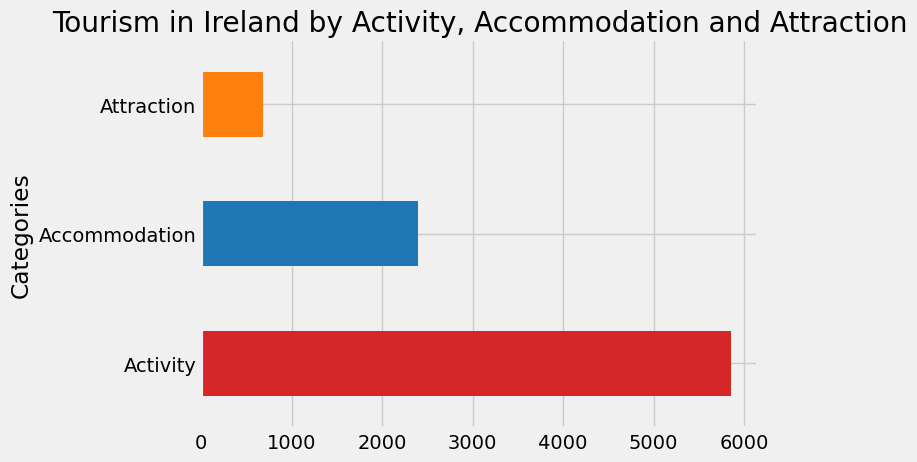

In [18]:
# Visualizing with Matplotlib
fig,ax = plt.subplots()

bar_colors = ['tab:red', 'tab:blue', 'tab:orange']
legend_title = 'Tourism in Ireland by Activity, Accommodation and Attraction'

combined_df['Type'].value_counts().plot(kind='barh', ylabel = 'Counts', xlabel = 'Categories', color=bar_colors, title=legend_title)
plt.show()

## Bar Chart to show Accommodation by County (AddressRegion)

Kerry has the most accommodation to offer, while Longford has the least.

<AxesSubplot:title={'center':'Accommodation by County'}, xlabel='County', ylabel='Accommodations Count'>

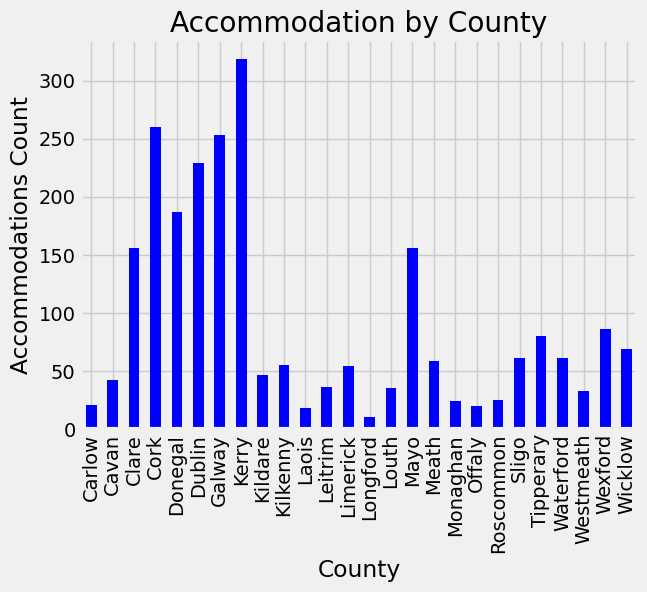

In [19]:
df1['AddressRegion'].value_counts().sort_index().plot(kind='bar', ylabel = 'Accommodations Count', xlabel = 'County', title = 'Accommodation by County',color = 'blue')


## Bar Chart to show Attractions by County (AddressRegion)

Again Kerry has the most attractions to offer, while Dublin has the least.

<AxesSubplot:title={'center':'Attractions by County'}, xlabel='County', ylabel='Attractions Count'>

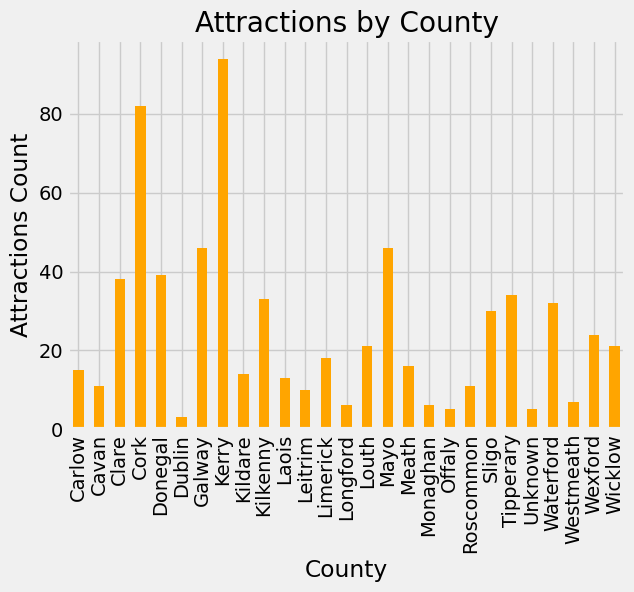

In [20]:
df2['AddressRegion'].value_counts().sort_index().plot(kind='bar', ylabel = 'Attractions Count', xlabel = 'County', title = 'Attractions by County',color = 'orange')


## Bar Chart to show Activities by County (AddressRegion)

Dublin has the most attractions to offer, while Fermanagh has the least.

<AxesSubplot:title={'center':'Activities by County'}, xlabel='County', ylabel='Activities Count'>

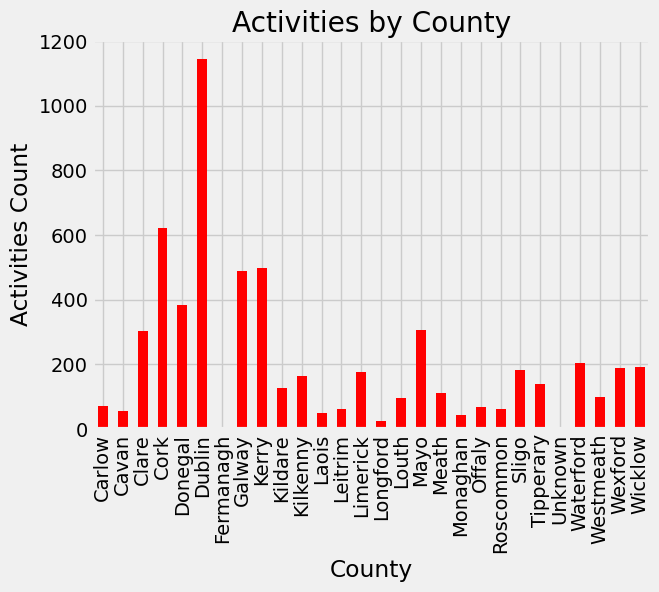

In [21]:
df3['AddressRegion'].value_counts().sort_index().plot(kind='bar', ylabel = 'Activities Count', xlabel = 'County', title = 'Activities by County',color = 'red')


## Combined bar chart by Activities, Accommodation and Attractions

This bar chart combines the activities, accommodation and attractions stacked in one chart. The index of counties is sorted in ascending order and shows a interesting pattern of tourism in Ireland.  Dublin has by far the most activities available, but few attractions. Cork and Kerry have the most even match of all 3.

['Carlow' 'Cavan' 'Clare' 'Cork' 'Donegal' 'Dublin' 'Fermanagh' 'Galway'
 'Kerry' 'Kildare' 'Kilkenny' 'Laois' 'Leitrim' 'Limerick' 'Longford'
 'Louth' 'Mayo' 'Meath' 'Monaghan' 'Offaly' 'Roscommon' 'Sligo'
 'Tipperary' 'Unknown' 'Waterford' 'Westmeath' 'Wexford' 'Wicklow']


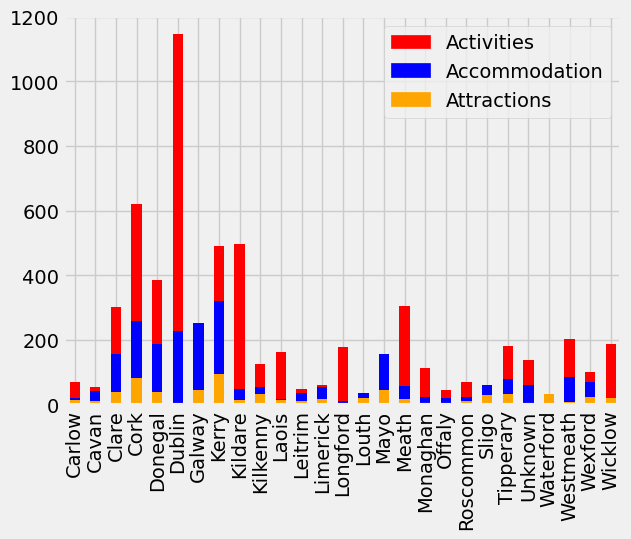

In [22]:
# Check that the index is sorted in order
index = combined_df['AddressRegion'].sort_values().unique()
print(index)

# plots are sorted in order from largest to smallest
df3['AddressRegion'].value_counts().sort_index().plot(kind='bar', color = 'red')
df1['AddressRegion'].value_counts().sort_index().plot(kind='bar', color = 'blue')
df2['AddressRegion'].value_counts().sort_index().plot(kind='bar', color = 'orange')

# This puts the legend label on the bar chart
red_patch = mpatches.Patch(color='red', label = 'Activities')
blue_patch = mpatches.Patch(color='blue', label = 'Accommodation') 
orange_patch = mpatches.Patch(color='orange',label= 'Attractions')
plt.legend(handles=[red_patch, blue_patch, orange_patch])

# Show the plot
plt.show()


## Machine learning

I am using Linear Regresson as an example of Supervised learning.  The file I am using for the example is sourced from Kaggle - link https://www.kaggle.com/datasets/carlmcbrideellis/house-prices-advanced-regression-solution-file

I am using this file as my previous files are not suitable.  The file is called solution.csv.

Predict a target variable with Supervised or Unsupervised algorithm
Perform hyper parameter tuning or boosting

## Import Data

Import data from csv - I am using this file as it is already cleaned and ready for use. 
My previous datasets are not suitable as they are mainly text based

In [23]:
# Import data from csv using Pandas
housingdf = pd.read_csv('solution.csv')

## Check the head

Check the data to see what it looks like.  

In [24]:
housingdf.head()

,Id,SalePrice
0,1461,105000.0
1,1462,172000.0
2,1463,189900.0
3,1464,195500.0
4,1465,191500.0


## Analyse distribution

Analyse distribuiton to see how the range of the data looks.  House prices start from a min price of 12,789 to a max price of 615,000.

In [25]:
housingdf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1459.0,2190.000000,421.321334,1461.0,1825.5,2190.0,2554.5,2919.0
SalePrice,1459.0,180493.324195,80521.891453,12789.0,128750.0,159000.0,213000.0,615000.0


## Get the model ready

Drop the SalePrice column from the X variable so that it just has the Id column.  Then create the y variable from the SalePrice column

In [26]:
# Create the X variable
X = housingdf.drop('SalePrice', axis = 1)
# Have a look at the result
print(X)

# Create the y variable
y = housingdf[['SalePrice']]
# Have a look at the result
print(y)

        Id
0     1461
1     1462
2     1463
3     1464
4     1465
...    ...
1454  2915
1455  2916
1456  2917
1457  2918
1458  2919

[1459 rows x 1 columns]
      SalePrice
0      105000.0
1      172000.0
2      189900.0
3      195500.0
4      191500.0
...         ...
1454    90500.0
1455    71000.0
1456   131000.0
1457   132000.0
1458   188000.0

[1459 rows x 1 columns]


## Import the training split

Next we want to split the training and test sets.  This model is split 30% for testing (denoted by test_size = 0.30) and 70% for training.


In [27]:
# Split X and y into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)


## Scatter plot


This simple scatter plot shows the distribution of the data

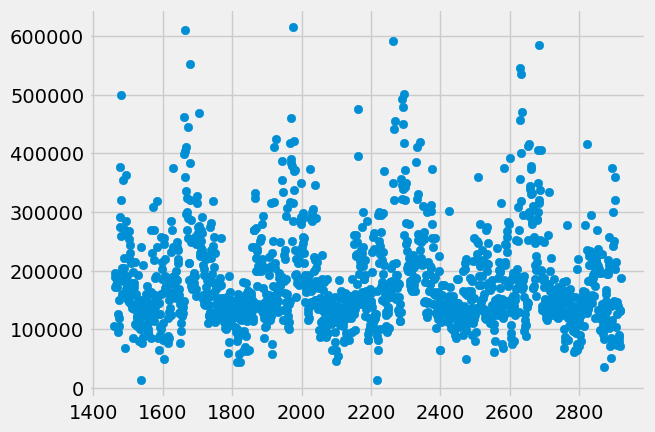

In [28]:
plt.scatter(X,y)
plt.show()

## Model used

The model I am using is LinearRegression.  This attempts to find the relationship between variables.  In machine learning, this relationship is used to predict the outcome of future events.

In [29]:
# Defining the model as LinearRegression
regression_model = LinearRegression()
# Setting up the training variable
regression_model.fit(X_train, y_train)

LinearRegression()

## Calculate the coefficient fo the Id column

In [30]:
# Calculate the co-efficient for the Id column. 

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Id is -10.479594797547671


## Check the intercept for the model

In [31]:
# Check the intercept for the model

intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 203414.01274057492


## Get the regression model score

In [32]:
# Model score - R2 or coeff of determinant

regression_model.score(X_test, y_test)

-0.0036285614387627785

## Outputing the plot

The type of plot I have chosen here is a scatter plot and the kind of plot of the diagonal subplots is a KDE or Kernal Density Estimate. As you can see the Id column is very dense but the SalePrice is not. I picked this combination after some experimentation as I thought it represented the data best. 

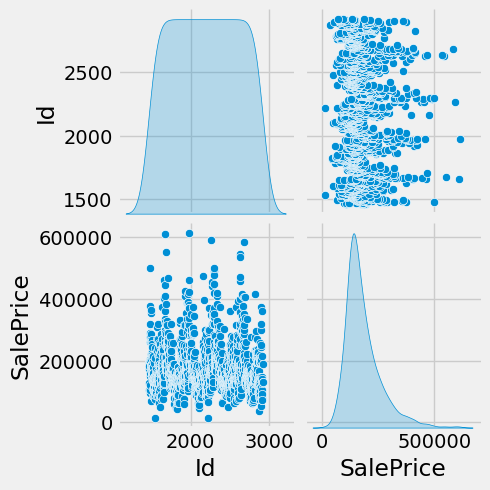

In [33]:
housingdf_attr = housingdf.iloc[:, 0:10]

sns.pairplot(housingdf_attr, kind = 'scatter', diag_kind='kde')


## Boosting

In boosting the models are trained sequentially, with the models trying to improve on the performance of the previous model.

I'm using the solution.csv in the boosting exercise.



## Read the data into housingdf2

In [34]:
# Read the data

housingdf2 = pd.read_csv('solution.csv')


## Iterate over the columns in the dataframe to get a unique value count

In [35]:
# Iterate over the columns to get the unique value counts

for col in housingdf2.columns:
    print('Unique value count of', col, 'is', len(housingdf2[col].unique()))

Unique value count of Id is 1459
Unique value count of SalePrice is 677


## Have a look at the data

In [36]:
housingdf2.head(10)

,Id,SalePrice
0,1461,105000.0
1,1462,172000.0
2,1463,189900.0
3,1464,195500.0
4,1465,191500.0
5,1466,175900.0
6,1467,185000.0
7,1468,180400.0
8,1469,171500.0
9,1470,126000.0


##  The model I'm using is a DecisionTreeClassifier

The accuracy is 100% so it would be difficult to improve on this with boosting.

In [37]:
Tree_model = DecisionTreeClassifier(criterion="entropy",max_depth=1)

X = housingdf2.drop('SalePrice', axis = 1)

y = housingdf2['SalePrice'].where(housingdf2['SalePrice']==1,-1)

prediction = np.mean(cross_validate(Tree_model,X,y,cv=100)['test_score'])
print(prediction)

print('The accuracy is: ', prediction * 100,'%')



1.0
The accuracy is:  100.0 %
